# **Online Payments Fraud Detection**

The project focuses on detecting fraudulent paymnets using machine learning techniques. It involves end-to-end steps from data exploration and preprocessing to model development and evaluation. The final goal is to build a reliable fraud detection model that can distinguish between legitimate and fraudulent transactions.

- **step**: represents a unit of time where 1 step equals 1 hour
- **type**: type of online transaction
- **amount**: the amount of the transaction
- **nameOrig**: customer starting the transaction
- **oldbalanceOrg**: balance before the transaction
- **newbalanceOrig**: balance after the transaction
- **nameDest**: recipient of the transaction
- **oldbalanceDest**: initial balance of recipient before the transaction
- **newbalanceDest**: the new balance of recipient after the transaction
- **isFraud**: fraud transaction

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Data Loading** 

In [16]:
data = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\Projects\Online Payments Fraud Detection\archive\PS_20174392719_1491204439457_log.csv")

Making a copy as the best practice

In [17]:
df = data.copy()
# we can always recover the orginal data by re-runing this cell without the need to reload the data from the file.

**Understaning the data**

In [18]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [19]:
df.shape

(6362620, 11)

In [20]:
#check missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [119]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

Checking data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Observation  - check each type, change what is needed 

In [22]:
df['step'].nunique()
# the point was to check if "step" is a categorical variable, but it is not.
# it is okay to keep it as a numerical variable

743

In [122]:
df['type'].nunique()
# it is a categorical variable

5

In [123]:
df['nameOrig'].nunique()
# It has too many unique values, this variable is a categorical variable but it is going to be used in analysis but won't be used in modeling

6353307

In [124]:
df['nameDest'].nunique()

2722362

<h3 style=>-- Univariate analysis --</h3>

* Categorical variables: step, type, nameOrig, nameDest, isFraud, isFlaggedFraud  
* Numerical variables: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

In [23]:
cat_var = ['type', 'isFraud']

In [24]:
num_var = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [25]:
num = df[num_var] #this is the subset

In [26]:
cat = df[cat_var]

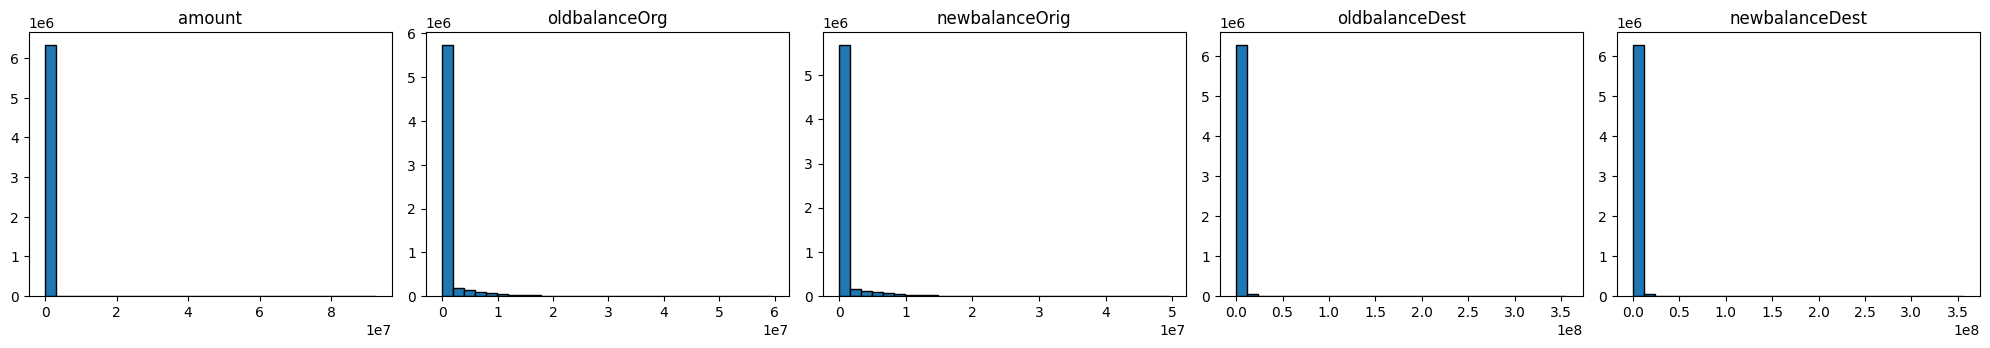

In [129]:
# Plot numerical variables

# Grid size
nrows, ncols = 5, 5  # Adjust based on how many variables you want to show
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()
# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # Hide unused plots
        continue
    ax.hist(num.iloc[:, i], bins=30, edgecolor='black')
    ax.set_title(num.columns[i])
plt.tight_layout()
plt.show()



Class distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


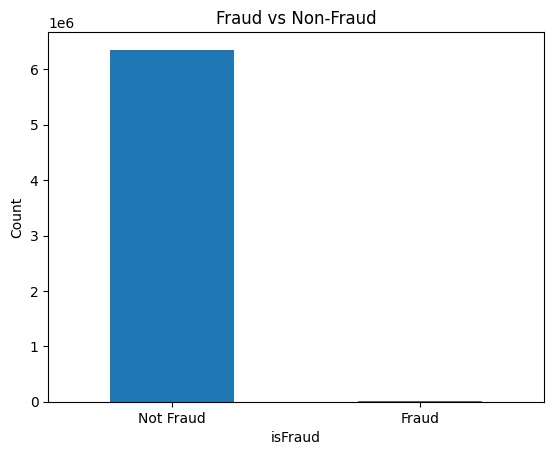

In [130]:
import matplotlib.pyplot as plt

# Value counts and percentage
print("\nClass distribution:")
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True) * 100)

# Bar plot
df['isFraud'].value_counts().plot(kind='bar', title='Fraud vs Non-Fraud', rot=0)
plt.xticks(ticks=[0,1], labels=['Not Fraud', 'Fraud'], rotation=0)
plt.ylabel('Count')
plt.show()


* 99.87% of the transactions are not fraud
* 0.13% of the transactions are fraud

In [131]:
print("Unique values in 'isFlaggedFraud':", df['isFlaggedFraud'].unique())

Unique values in 'isFlaggedFraud': [0 1]


In [132]:
flagged_rows = df[df['isFlaggedFraud'] > 0]  # Filter rows where value is greater than 0
print("Number of rows with isFlaggedFraud > 0:", len(flagged_rows))
print(flagged_rows[['isFlaggedFraud']])  # Print only the 'isFlaggedFraud' column for these rows


Number of rows with isFlaggedFraud > 0: 16
         isFlaggedFraud
2736446               1
3247297               1
3760288               1
5563713               1
5996407               1
5996409               1
6168499               1
6205439               1
6266413               1
6281482               1
6281484               1
6296014               1
6351225               1
6362460               1
6362462               1
6362584               1


In [133]:
# Filter missed frauds
missed_frauds = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]

# Total missed frauds
print(f"Missed frauds (not flagged): {len(missed_frauds)}")

# Optional: compare with total frauds
total_frauds = df[df['isFraud'] == 1]
print(f"Total frauds in dataset: {len(total_frauds)}")

# Percent missed
percent_missed = (len(missed_frauds) / len(total_frauds)) * 100
print(f"Percentage of frauds missed by flag: {percent_missed:.2f}%")


Missed frauds (not flagged): 8197
Total frauds in dataset: 8213
Percentage of frauds missed by flag: 99.81%


* The flag missed 99.81% of fraud. The model that will be build will try to detect higher %

In [134]:
#  Show unique values and their count
value_counts = df['type'].value_counts()
print(value_counts)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


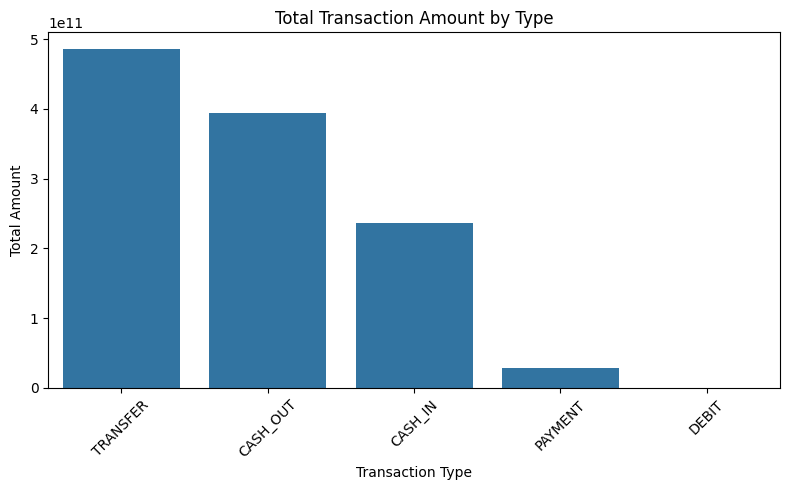

In [135]:
# Group by transaction type and sum the amount
amount_by_type = df.groupby("type")["amount"].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=amount_by_type, x="type", y="amount")
plt.title("Total Transaction Amount by Type")
plt.ylabel("Total Amount")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3 style=>-- Bivariate analysis --</h3>

* Categorical variables: step, type, nameOrig, nameDest, isFraud, isFlaggedFraud  
* Numerical variables: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

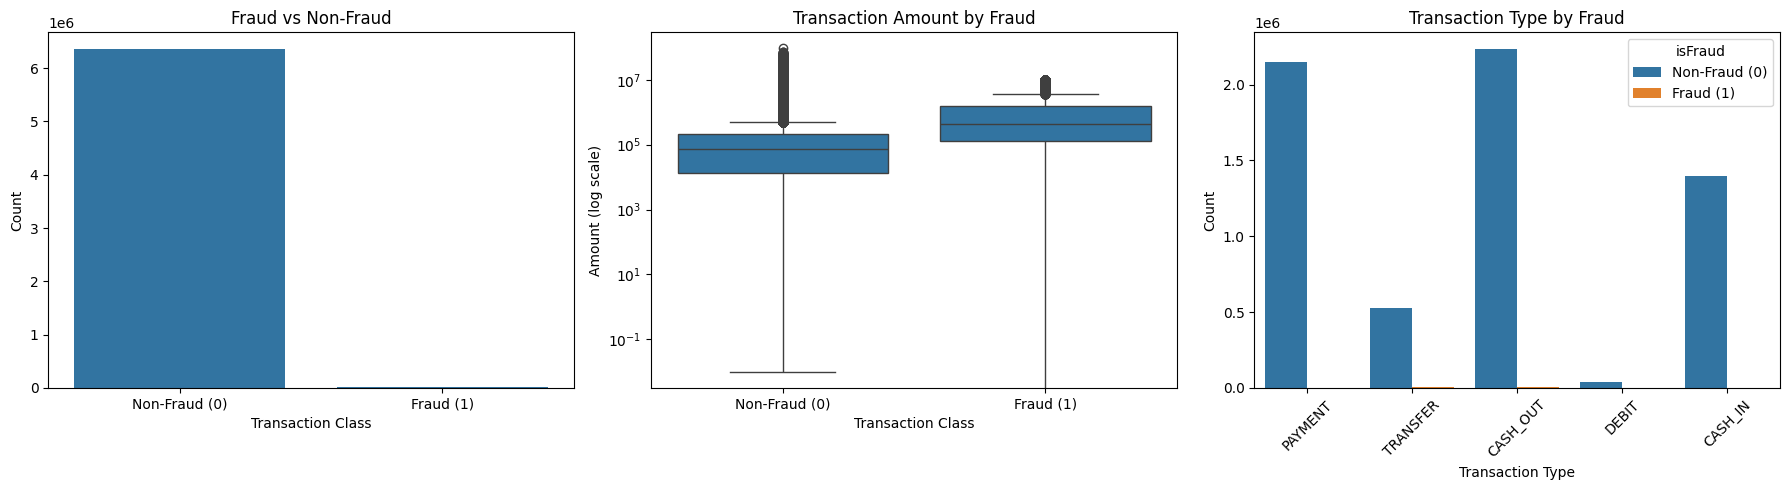

In [136]:
# Map fraud labels to more descriptive text
df['isFraud'] = df['isFraud'].map({0: 'Non-Fraud (0)', 1: 'Fraud (1)'})

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Class Distribution
sns.countplot(x='isFraud', data=df, ax=axes[0])
axes[0].set_title('Fraud vs Non-Fraud')
axes[0].set_xlabel('Transaction Class')
axes[0].set_ylabel('Count')

# Plot 2: Transaction Amount by Fraud
sns.boxplot(x='isFraud', y='amount', data=df, ax=axes[1])
axes[1].set_yscale('log')  # log scale to manage outliers
axes[1].set_title('Transaction Amount by Fraud')
axes[1].set_xlabel('Transaction Class')
axes[1].set_ylabel('Amount (log scale)')

# Plot 3: Transaction Type by Fraud
sns.countplot(x='type', hue='isFraud', data=df, ax=axes[2])
axes[2].set_title('Transaction Type by Fraud')
axes[2].set_xlabel('Transaction Type')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- 1st plot: the dataset is highly imbalanced with a significant majority of non-fraudulent transactions -> the focus should be in precision, recall, F1, ROC AUC
- 2nd plot: log scale is used because transaction amounts often vary wildly, fraud is more likely with larger transfer amounts
- 3rd plot: for each transaction, the plot shows how many were fraud vs. non-fraud -> fraud is more comon in "transfer" and "cash_out" transactions

In [137]:
# slit the dataset into fraud and non-fraud transactions
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0]

<Axes: xlabel='isFraud', ylabel='amount'>

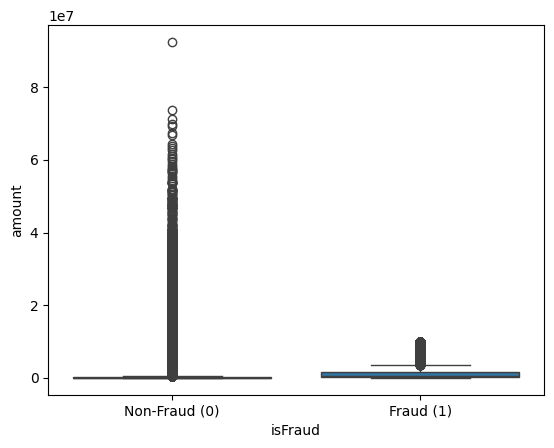

In [138]:
sns.boxplot(x='isFraud', y='amount', data=df)

* non-faud has more outliers
* fraud has higher amounts

* - oldbalanceOrg: balance of sender before transaction
* - newbalanceOrig: balance of sender after transaction
* - oldbalanceDest: balance of receiver before
* - newbalanceDest: balance of receiver after

* The origin account (sender) should have money taken out.
* The destination account (receiver) should have money added.
- In normal transactions:
* deltaOrigin ≈ amount sent
* deltaDest ≈ amount received
* In fraud, that relationship might be inconsistent, exaggerated, or zero (no real money moved).

<Axes: xlabel='isFraud', ylabel='deltaOrigin'>

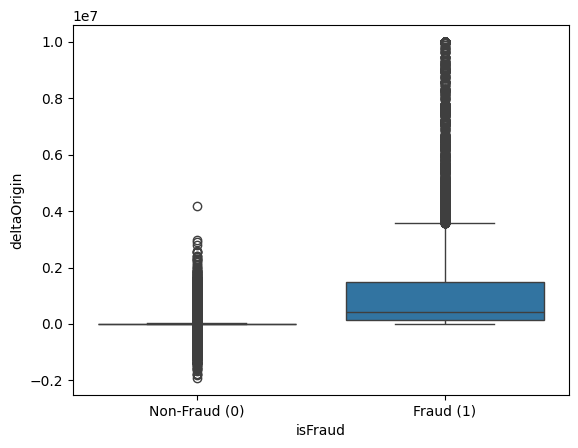

In [140]:
# balance changes
df['deltaOrigin'] = df['oldbalanceOrg'] - df['newbalanceOrig']  #  how much money left the sender’s account
df['deltaDest'] = df['newbalanceDest'] - df['oldbalanceDest']   # how much money was added to the receiver’s account

# plot balance changes
sns.boxplot(x='isFraud', y='deltaOrigin', data=df)

- most normal transactions don’t significantly change the sender’s balance.

These might include:
* Small value transactions
* Reversed or cancelled payments
* Transfers between owned accounts
* Outliers on both sides (positive & negative): suggest normal users sometimes send or receive larger values, but it’s not common.

- Fraud Median is Above 0 and Always Positive

* It means: In fraud transactions: oldbalanceOrg - newbalanceOrig > 0, meaning money is removed from the sender’s account.
- This makes sense for fraudulent TRANSFER or CASH_OUT, where attackers move funds out of a victim’s account.
* All values in positive deltaOrigin:
- Fraud usually causes an actual decrease in the origin balance — no refunds, no balance reset.

* Fraud Outliers Are Much Higher Than Non-Fraud - Fraudsters often move large amounts of money — trying to extract maximum value before detection.
* This creates long tails in the plot — far larger deltaOrigin than what’s seen in normal activity.

c:\Users\Gebruiker\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='isFraud', ylabel='deltaOrigin'>

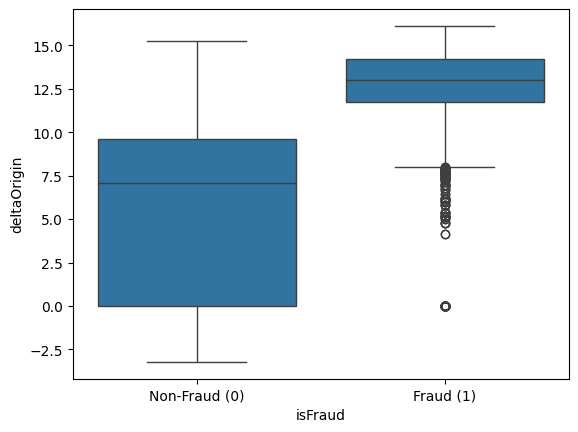

In [142]:
df['high_delta_origin'] = df['deltaOrigin'] > 1_000_000  # or any threshold based on distribution
df['deltaOrigin_to_amount'] = df['deltaOrigin'] / (df['amount'] + 1)

sns.boxplot(x='isFraud', y=np.log1p(df['deltaOrigin']), data=df)

#it shows in fraud that most of the trasations are quite high
#fraud usually involves larger balance deductions


In [ ]:
# fraud count per transaction type
fraud_per_type = pd.crosstab(df['type'], df['isFraud'])
print("\nFraud vs Transaction Type:")
print(fraud_per_type)


Fraud vs Transaction Type:
isFraud   Fraud (1)  Non-Fraud (0)
type                              
CASH_IN           0        1399284
CASH_OUT       4116        2233384
DEBIT             0          41432
PAYMENT           0        2151495
TRANSFER       4097         528812


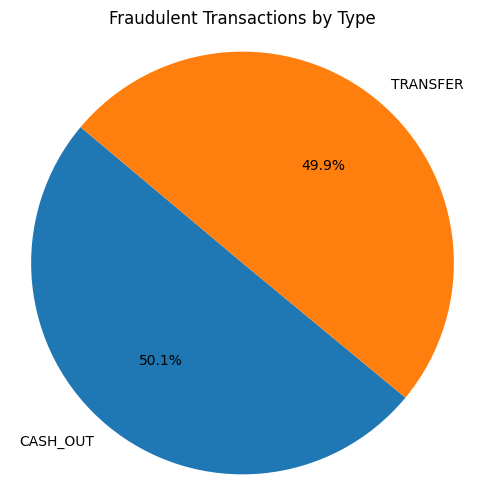

In [ ]:
# categorical plot

fraud_counts = pd.Series({
    "CASH_OUT": 4116,
    "TRANSFER": 4097
})

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    fraud_counts, 
    labels=fraud_counts.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Fraudulent Transactions by Type")
plt.axis('equal')  # Keep pie chart circular
plt.show()

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   

                newbalanceDest  
amount                0.459304  
oldbalanceOrg         0.042029  
newbalanceOrig        0.041837  
oldbalanceDest        0.976569  
newbalanceDest        1.000000  


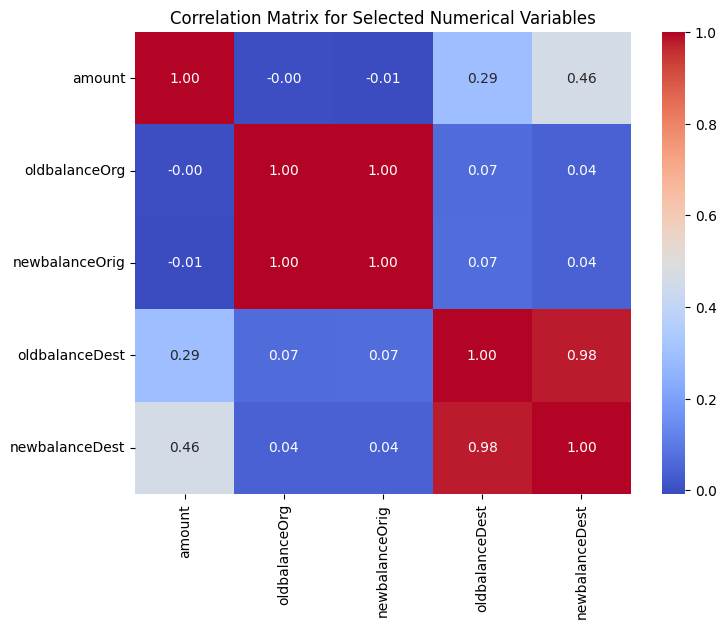

In [ ]:
num_var = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Subset the DataFrame
num_df = df[num_var]

# Compute correlation matrix
corr_matrix = num_df.corr()

# Print correlation matrix
print(corr_matrix)

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Numerical Variables')
plt.show()

---------Something to take a look later at----------------

In [ ]:
#Create a boolean mask for the suspicious pattern
suspicious_mask = (df['oldbalanceOrg'] == df['amount']) & (df['newbalanceOrig'] == 0)

# Filter transactions that match the pattern
suspicious_transactions = df[suspicious_mask]

# Split by fraud status
suspicious_frauds = suspicious_transactions[suspicious_transactions['isFraud'] == 1]
suspicious_legit = suspicious_transactions[suspicious_transactions['isFraud'] == 0]

# Output summary
print(f" Total suspicious transactions: {len(suspicious_transactions)}")
print(f"Fraudulent suspicious transactions: {len(suspicious_frauds)}")
print(f"Legitimate suspicious transactions: {len(suspicious_legit)}")

 Total suspicious transactions: 8024
Fraudulent suspicious transactions: 8024
Legitimate suspicious transactions: 0


In [ ]:
# Create a new column that flags if the account was emptied
df['accountEmptied'] = (df['oldbalanceOrg'] == df['amount']) & (df['newbalanceOrig'] == 0)

# View how many accounts were emptied
emptied_summary = df['accountEmptied'].value_counts()

# Optional: preview some examples
emptied_examples = df[df['accountEmptied'] == True][['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]

# Print results
print("Account emptied after transaction:")
print(emptied_summary)
print("\nSample emptied transactions:")
print(emptied_examples.head())

Account emptied after transaction:
accountEmptied
False    6354596
True        8024
Name: count, dtype: int64

Sample emptied transactions:
         type   amount  oldbalanceOrg  newbalanceOrig  isFraud
2    TRANSFER    181.0          181.0             0.0        1
3    CASH_OUT    181.0          181.0             0.0        1
251  TRANSFER   2806.0         2806.0             0.0        1
252  CASH_OUT   2806.0         2806.0             0.0        1
680  TRANSFER  20128.0        20128.0             0.0        1


In [ ]:
# Filter transactions where amount > 200k
high_value_txns = df[df['amount'] > 200000]

# Show how many and a preview
print(f" Total transactions above 200k: {len(high_value_txns)}")

 Total transactions above 200k: 1673570


In [ ]:
# Filter transactions where amount > 190,000
high_value_txns = df[df['amount'] > 190000]

# Show how many
print(f"Total transactions above 190k: {len(high_value_txns)}")

high_value_txns.head(20)

Total transactions above 190k: 1771750


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_code,accountEmptied
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,1,False
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,4,False
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,4,False
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,4,False
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0,4,False
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0,4,False
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0,4,False
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0,4,False
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0,4,False
90,1,TRANSFER,358831.92,C908084672,0.00,0.0,C392292416,474384.53,3420103.09,0,0,4,False


In [ ]:
# Count unique values in 'accountEmptied'
account_emptied_counts = df['accountEmptied'].value_counts()

# Print the result
print("🔍 Account Emptied Status Counts:")
print(account_emptied_counts)


🔍 Account Emptied Status Counts:
accountEmptied
False    6354596
True        8024
Name: count, dtype: int64


**Feature engineering**

In [149]:
# Time based features#

# Assume each step = 1 hour
df['day'] = df['step'] // 24 #gives the whole number of days since the start

df[['step', 'day']].head(10)

,step,day
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [ ]:
#frequent transfers#

# counts how many total transactions the sender (nameOrig) has made in the entire dataset, the count is repeated for all rows associated with that sender
df['txnCountOrig'] = df.groupby('nameOrig')['nameOrig'].transform('count') # how active a sender is. Fraudsters often act fast in a small number of transactions.

# how many times each destination account (nameDest) receives money
df['txnCountDest'] = df.groupby('nameDest')['nameDest'].transform('count') # tells you how many times an account is receiving funds — some mule accounts collect from many compromised senders.

print(df[['nameOrig', 'nameDest', 'txnCountOrig', 'txnCountDest']].head(20)) # show origin and destination transaction counts

       nameOrig     nameDest  txnCountOrig  txnCountDest
0   C1231006815  M1979787155             1             1
1   C1666544295  M2044282225             1             1
2   C1305486145   C553264065             1            44
3    C840083671    C38997010             1            41
4   C2048537720  M1230701703             1             1
5     C90045638   M573487274             1             1
6    C154988899   M408069119             1             1
7   C1912850431   M633326333             1             1
8   C1265012928  M1176932104             1             1
9    C712410124   C195600860             1            34
10  C1900366749   C997608398             1            59
11   C249177573  M2096539129             1             1
12  C1648232591   M972865270             1             1
13  C1716932897   M801569151             1             1
14  C1026483832  M1635378213             1             1
15   C905080434   C476402209             1            41
16   C761750706  M1731217984   

In [ ]:
df['txnCountOrig'].value_counts().sort_index()
# summarize how many accounts have how many transactions

txnCountOrig
1    6344009
2      18566
3         45
Name: count, dtype: int64

------- end ---------

<h3 style=>-- For Model Building --</h3>

Encode variables

In [27]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

Drop irrelevant columns

In [28]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

Save to CSV

In [30]:
df.to_csv("cleaned_fraud_dataset.csv", index=False)

Models are trained in different notebook